# 4.  Australia 'Data' Salary Bracket Analysis

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

style.use('ggplot')


C:\Users\tzechiang\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# read in the data that has been scraped and cleaned
dummy = pd.read_csv('./datasets/dummy_stem.csv')

In [3]:
dummy.shape

(14425, 43)

In [4]:
dummy.head(2)

,Unnamed: 0,title,summary,salary_bracket,salary_high,s_NSW,s_NT,s_QLD,s_SA,s_TAS,...,c_Legal,"c_Manufacturing, Transport & Logistics",c_Marketing & Communications,"c_Mining, Resources & Energy",c_Real Estate & Property,c_Retail & Consumer Products,c_Sales,c_Science & Technology,c_Sport & Recreation,c_Trades & Services
0,0,Category Data Assistant,About Us TerryWhite Chemmart (TWCM) is Austral...,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Administrator,About the business and the role This could be...,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# drop ['Unnamed: 0'] columns
dummy.drop(columns = ['Unnamed: 0'], inplace=True)

In [6]:
dummy.tail(2)

,title,summary,salary_bracket,salary_high,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,...,c_Legal,"c_Manufacturing, Transport & Logistics",c_Marketing & Communications,"c_Mining, Resources & Energy",c_Real Estate & Property,c_Retail & Consumer Products,c_Sales,c_Science & Technology,c_Sport & Recreation,c_Trades & Services
14423,Instructional Designer - Digital Literacy Trai...,Bluefin are working with a Federal government ...,250,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14424,Frontend Team Lead,We are on the lookout for an experienced and p...,250,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dummy.isnull().sum().sum()

0

Create and compare at least two models for each section. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).

Section 1: Job Salary Trends
Section 2: Job Category Factors

## Set up the Target and Predictors

Target is what I want to predict using Predictors 

In [8]:
dummy.columns

Index(['title', 'summary', 'salary_bracket', 'salary_high', 's_NSW', 's_NT',
       's_QLD', 's_SA', 's_TAS', 's_VIC', 's_WA', 'title_stem', 'summary_stem',
       'stem', 'c_Administration & Office Support',
       'c_Advertising, Arts & Media', 'c_Banking & Financial Services',
       'c_CEO & General Management', 'c_Call Centre & Customer Service',
       'c_Community Services & Development', 'c_Construction',
       'c_Consulting & Strategy', 'c_Design & Architecture',
       'c_Education & Training', 'c_Engineering',
       'c_Farming, Animals & Conservation', 'c_Government & Defence',
       'c_Healthcare & Medical', 'c_Hospitality & Tourism',
       'c_Human Resources & Recruitment',
       'c_Information & Communication Technology',
       'c_Insurance & Superannuation', 'c_Legal',
       'c_Manufacturing, Transport & Logistics',
       'c_Marketing & Communications', 'c_Mining, Resources & Energy',
       'c_Real Estate & Property', 'c_Retail & Consumer Products', 'c_Sales',
 

In [9]:
dummy['salary_bracket'] = dummy['salary_bracket'].astype('category')

## Select Target and Predictors

In [10]:
# Target: Job Salary Trends
y = dummy['salary_bracket']

# Features/Predictor: title & summary, and calssification
#salary['titlesummary'].str.lower()
X = dummy.drop(columns=['title', 'summary', 'salary_bracket', 'salary_high', 'title_stem', 'summary_stem'])

## Split to Train and test set

In [11]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## Apply Natural Language Processing (NLP) and KBest Feature Selection

Now I have the data set with selected features words from the job title and summary 

Time to apply NLP modeling technique to see which model predit the best salary outcome

In [12]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)
# add own custom stopwords
word_list = ['thi', 'skill','click', 'job', 'role', 'cover', 'letter','resume', 'apply', 'button', 'abil'
             'quot', 'pleas', 'requir', 'phone', 'call', 'provid', 'includ', 'success', 'com', 'au', 'strong']
for w in word_list:
    custom_stop_words.append(w)


In [13]:
from wordcloud import WordCloud

def generate_word_cloud(words):
    
    stem_words = ' '
    
    for val in words:
        #val = str(val).lower()
        #line = re.sub(r"[^a-zA-Z\d\s.]+", " ", str(val))
        tokens = str(val).replace(".", " ").split()
        stemmed_tokens = [token.strip() for token in tokens] 
        stem_words = ' '.join(stemmed_tokens)
    
    
    wordcloud = WordCloud(width = 480, height = 480,
                    background_color ='white', 
                    stopwords = custom_stop_words, 
                    min_font_size = 8).generate(stem_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

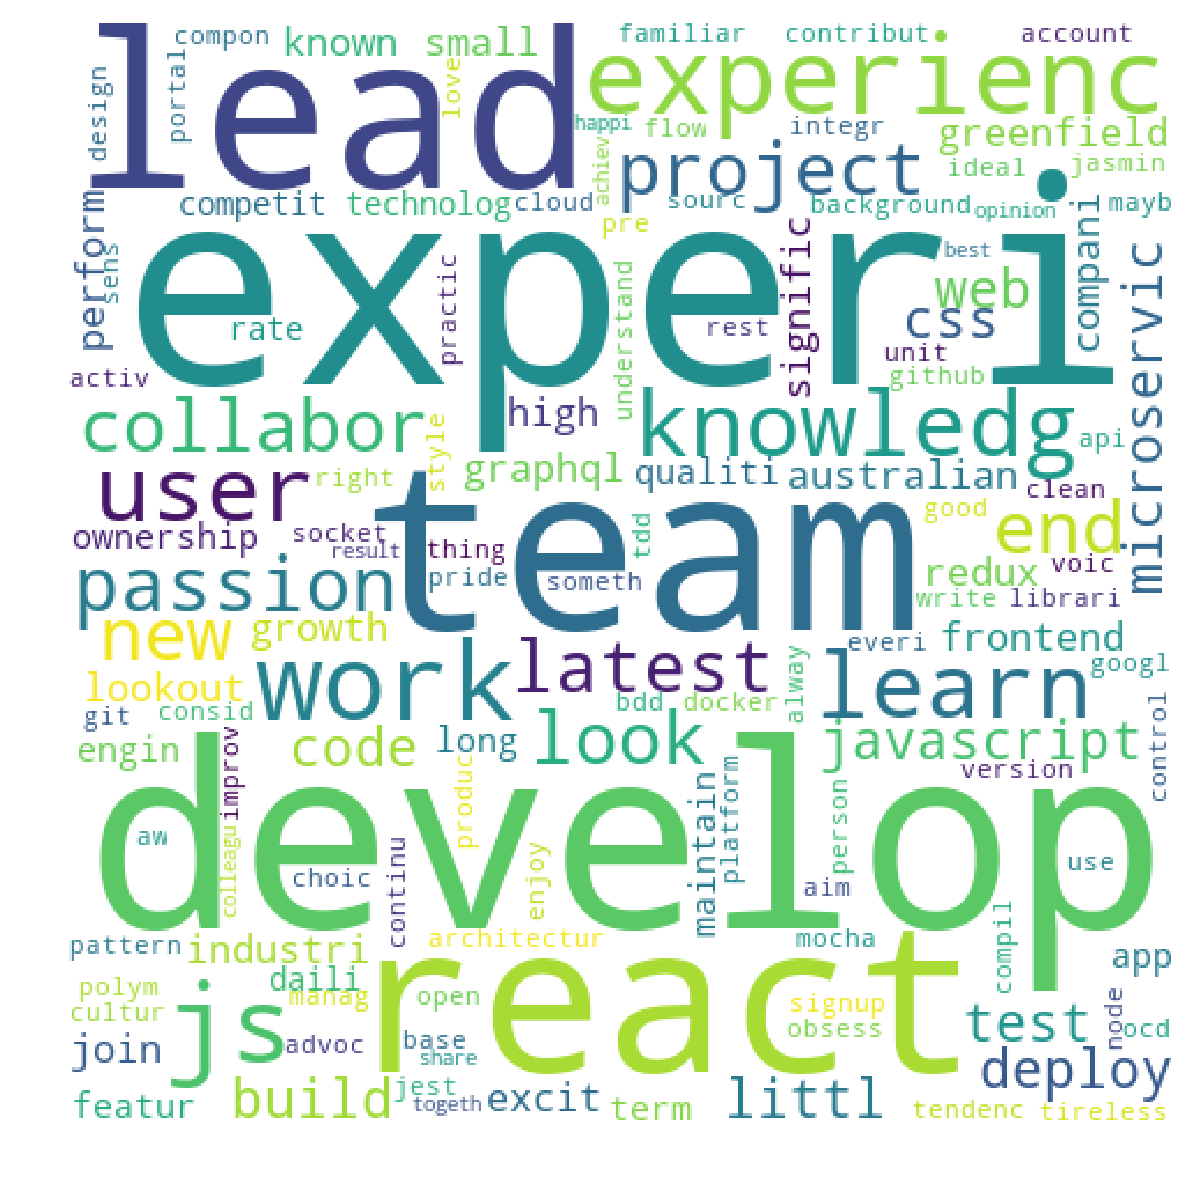

In [14]:
# generate word cloud - for the whole set
generate_word_cloud(X.stem)

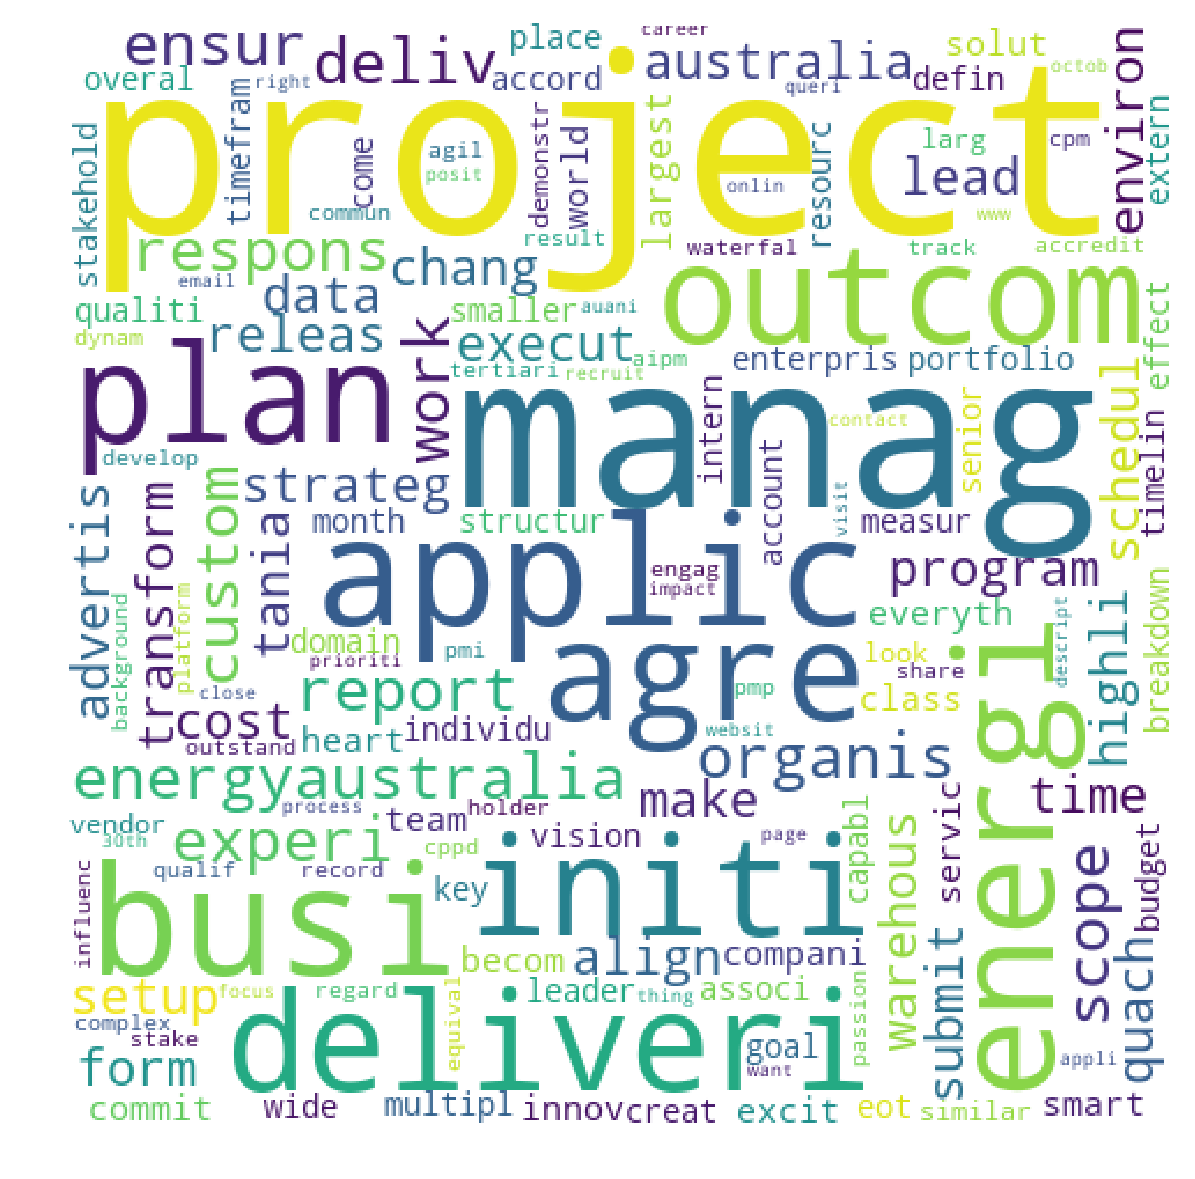

In [15]:
# generate word cloud - for the train set
generate_word_cloud(X_train.stem)

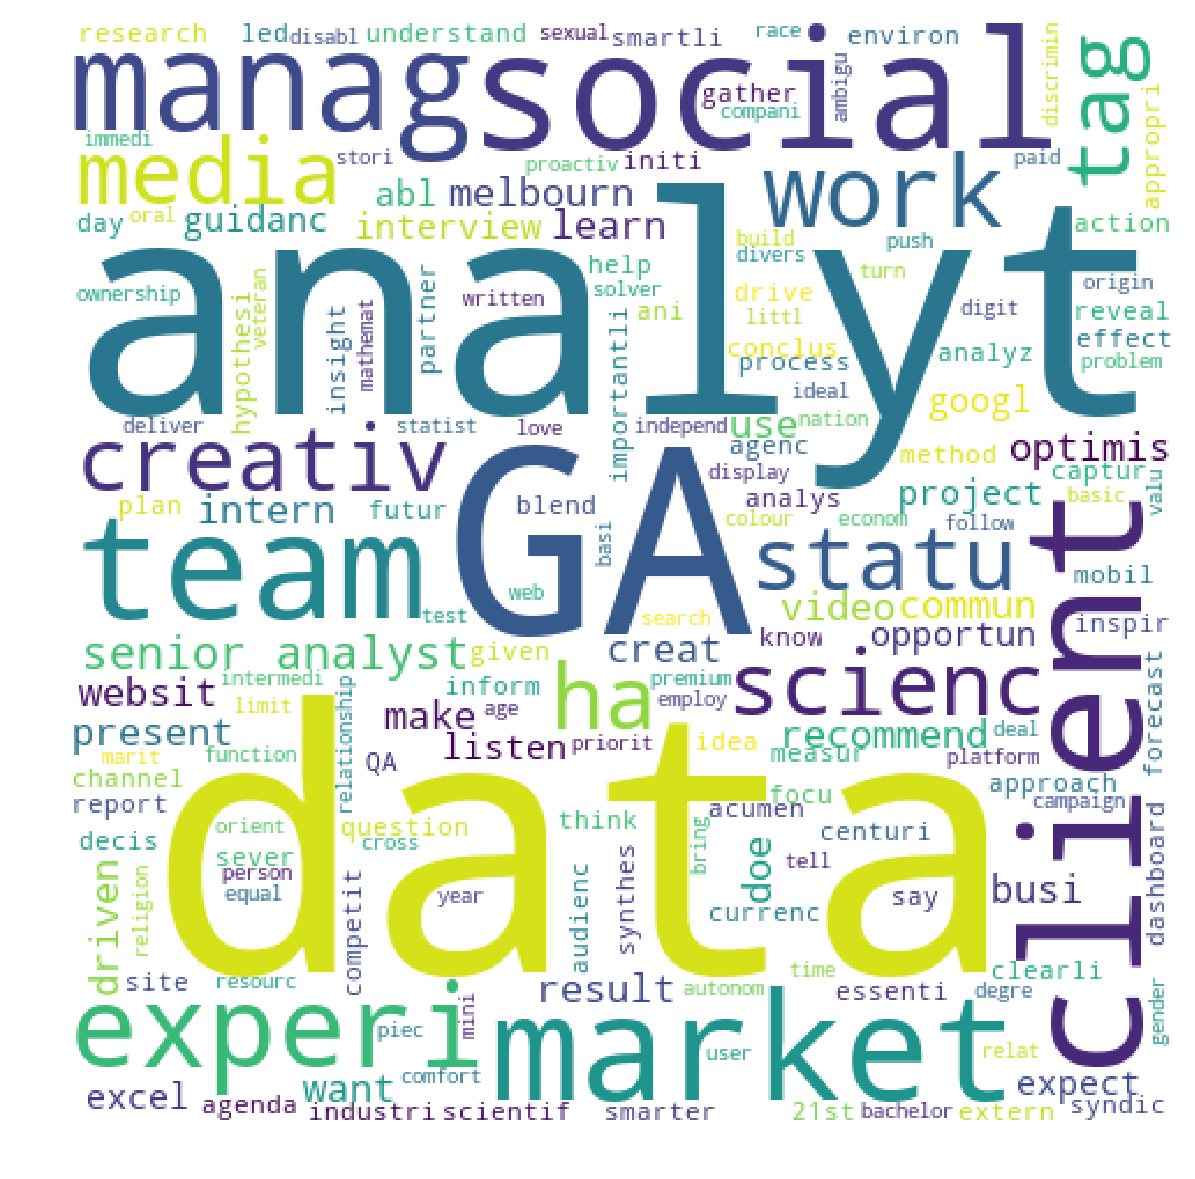

In [16]:
# generate word cloud - for the train set
generate_word_cloud(X_test.stem)

In [17]:
def generate_word_cloud_freq(words):
    
    wordcloud = WordCloud(width = 480, height = 480,
                    background_color ='white', 
                    stopwords = custom_stop_words, 
                    min_font_size = 8).generate_from_frequencies(words)

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

### Predict using Mltinomail Naive Bayes 

Predict using Mltinomail Naive Bayes with the new features from CountVectorizer.

In [18]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vec):
    
    # Create document-term matrices - NLP
    #------------------------------------------------------------
    # Fitting and Transfrom the vectorizer on training data
    X_train_vec = vec.fit_transform(X_train['stem'])
    print('Features: ', X_train_vec.shape[1])

    # Transform on test data
    X_test_vec = vec.transform(X_test['stem'])
    #------------------------------------------------------------
    
    # Create dataframe after document-term matrices has been created
    #------------------------------------------------------------
    X_train_vec_df = pd.DataFrame(X_train_vec.todense(), columns=vec.get_feature_names())
    X_test_vec_df = pd.DataFrame(X_test_vec.todense(), columns=vec.get_feature_names())
    #------------------------------------------------------------
    
    # Extract top 10 and EDA
    #------------------------------------------------------------
    # top 10 words with highest frequency - work experience, management, data, team
    words = X_train_vec_df.sum().sort_values(ascending=False) #.head(20)
    #print(words)
    
    # plot top 10 words
    #words.plot(kind='bar', figsize=(15, 5))
    #------------------------------------------------------------

    generate_word_cloud_freq(words.to_dict())
    
    # Combine to create the full set of X
    #------------------------------------------------------------
    # remove stem columns as it now has been processed
    mask_train_df = X_train.drop('stem',axis=1).reset_index(drop=True)
    mask_test_df = X_test.drop('stem',axis=1).reset_index(drop=True)

    # time to put the data back to the main X_train and X_test
    X_train_dtm = pd.concat([mask_train_df, X_train_vec_df], axis=1)
    X_test_dtm = pd.concat([mask_test_df, X_test_vec_df], axis=1)
    #------------------------------------------------------------
    
    
    # Kbest Feature Selection after NLP
    #----------------------------------------------------------
    # build the selector (build one with each score type)
    skb_f = SelectKBest(f_classif) # default is k=10)

    # train the selector on data
    skb_f.fit(X_train_dtm, y_train)

    # examine results
    kbest = pd.DataFrame({'variable': X_train_dtm.columns.values.tolist(),
                         'score': list(skb_f.scores_)}).sort_values('score', ascending = False)
    
    kbest.columns = ['kBest_features', 'kBest_score']    
    kbest.reset_index(inplace=True, drop=True)

    # plot top 10 features
    kbest.head(20).plot(kind='bar', x='kBest_features', y='kBest_score', figsize=(15,5), grid=True)
    
    X_Ktrain = X_train_dtm[kbest.kBest_features]
    X_Ktest = X_test_dtm[kbest.kBest_features]

    return (X_Ktrain, X_Ktest)

In [19]:
def apply_model(model, model_name, X_train_data, X_test_data):
    
#     print ('-----------------------------------')
#     print (model_name)
#     print ('-----------------------------------')
    model.fit(X_train_data,y_train)

    y_pred = model.predict(X_test_data)
    
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy score for best params: %.3f ' % accuracy)
    
    model_scores = cross_val_score(model, X_train_data, y_train, cv=5)
    train_score = model.score(X_train_data, y_train) 
    test_score = model.score(X_test_data, y_test)
#     print('Train score: %.3f ' % train_score)
#     print('Test score: %.3f ' % test_score)
    
    
    accuracy_crossval = np.mean(model_scores)
#     print('Train Mean CV R2: %.3f ' % accuracy_crossval)
    
    return [train_score, test_score, accuracy_crossval, accuracy]


In [20]:
### Setting the countvectorizer with different parameters to see the differences

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS)
# add own custom stopwords
word_list = ['thi', 'skill','click', 'job', 'role', 'cover', 'letter','resume', 'apply', 'button', 'abil'
             'quot', 'pleas', 'requir', 'phone', 'call', 'provid', 'includ', 'success', 'com', 'au', 'strong']
for w in word_list:
    custom_stop_words.append(w)


In [22]:
def roc_curve_plot():

    plt.figure(figsize=[8,8])

    plt.plot(fpr, tpr, label='Original (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot(fpr_ridge, tpr_ridge, label='Ridge (area = %0.2f)' % roc_auc_ridge, 
             linewidth=4, color='darkred')
    plt.plot(fpr_lasso, tpr_lasso, label='Lasso (area = %0.2f)' % roc_auc_lasso, 
             linewidth=4, color='darkgoldenrod')

    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic: is male', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
    
    return None;

In [23]:
mnb = MultinomialNB()
bnb = BernoulliNB()
logistic_l1 = LogisticRegression(penalty='l1')
logistic_l2 = LogisticRegression(penalty='l2')
rfr=RandomForestClassifier(max_depth=50,n_estimators=100, n_jobs=-1)
#knn = KNeighborsClassifier()

# logistic_l1 = LogisticRegression(C=10, solver='liblinear', penalty='l1', verbose=1)
# logistic_l2 = LogisticRegression(C=10, solver='liblinear', penalty='l2', verbose=1)

models = { mnb: 'Multinomail Naive Bayes',
          bnb: 'BernoulliNB Naive Bayes',
          logistic_l1: 'Logistic Regression L1',
          logistic_l2: 'Logistic Regression L2',
          rfr: 'Random Forest'}

colNames = ['Train', 'Test','Accuracy Crossval', 'Accuracy Score']

Features:  1000


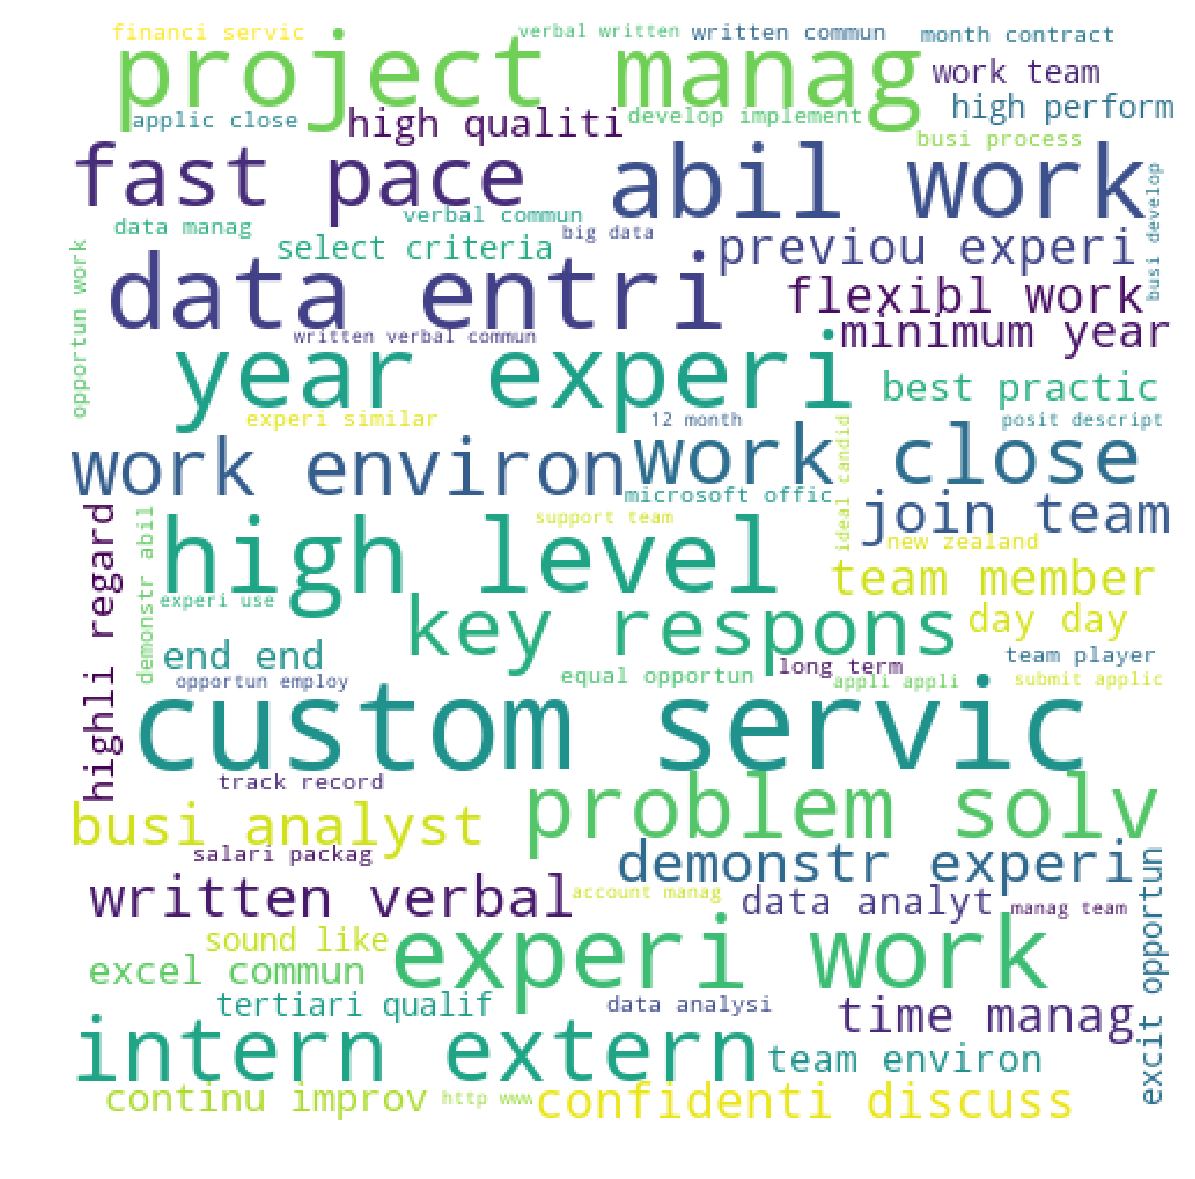

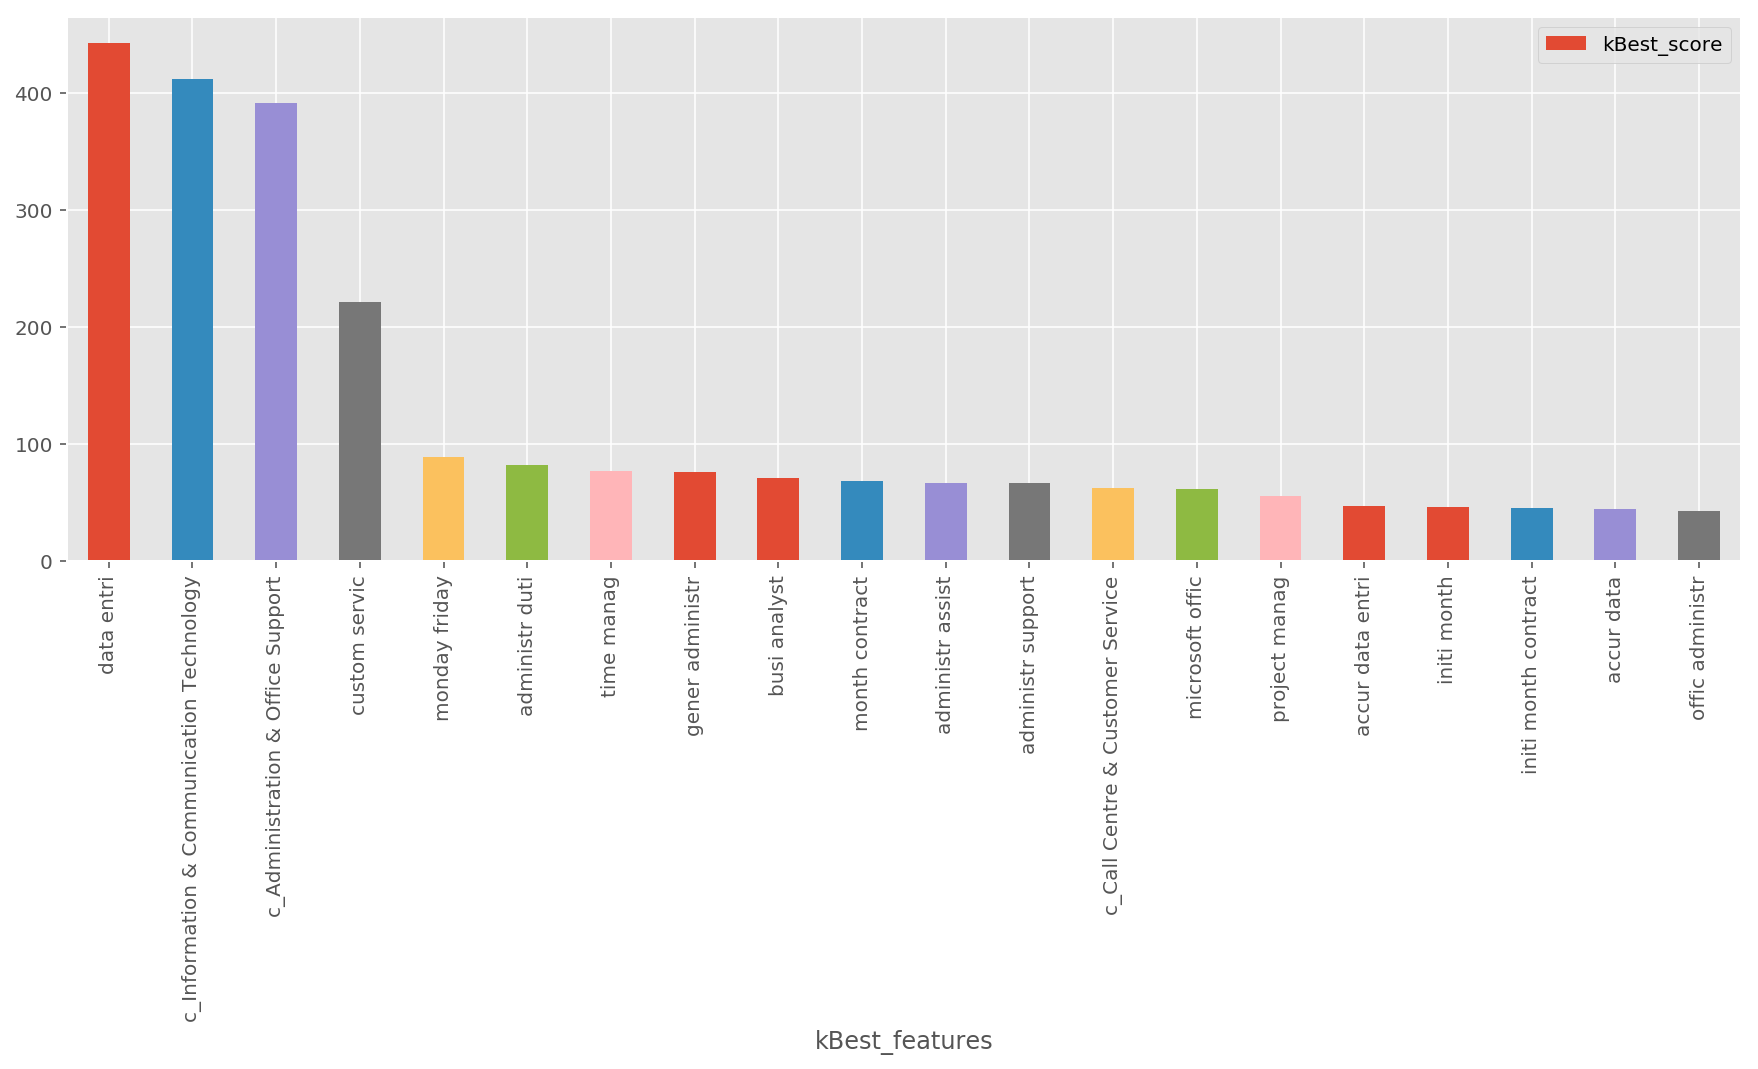

In [24]:
cvec = CountVectorizer(ngram_range=(2,3), stop_words=custom_stop_words, max_features=1000)
X_train_data1, X_test_data1 = tokenize_test(cvec)

Features:  200


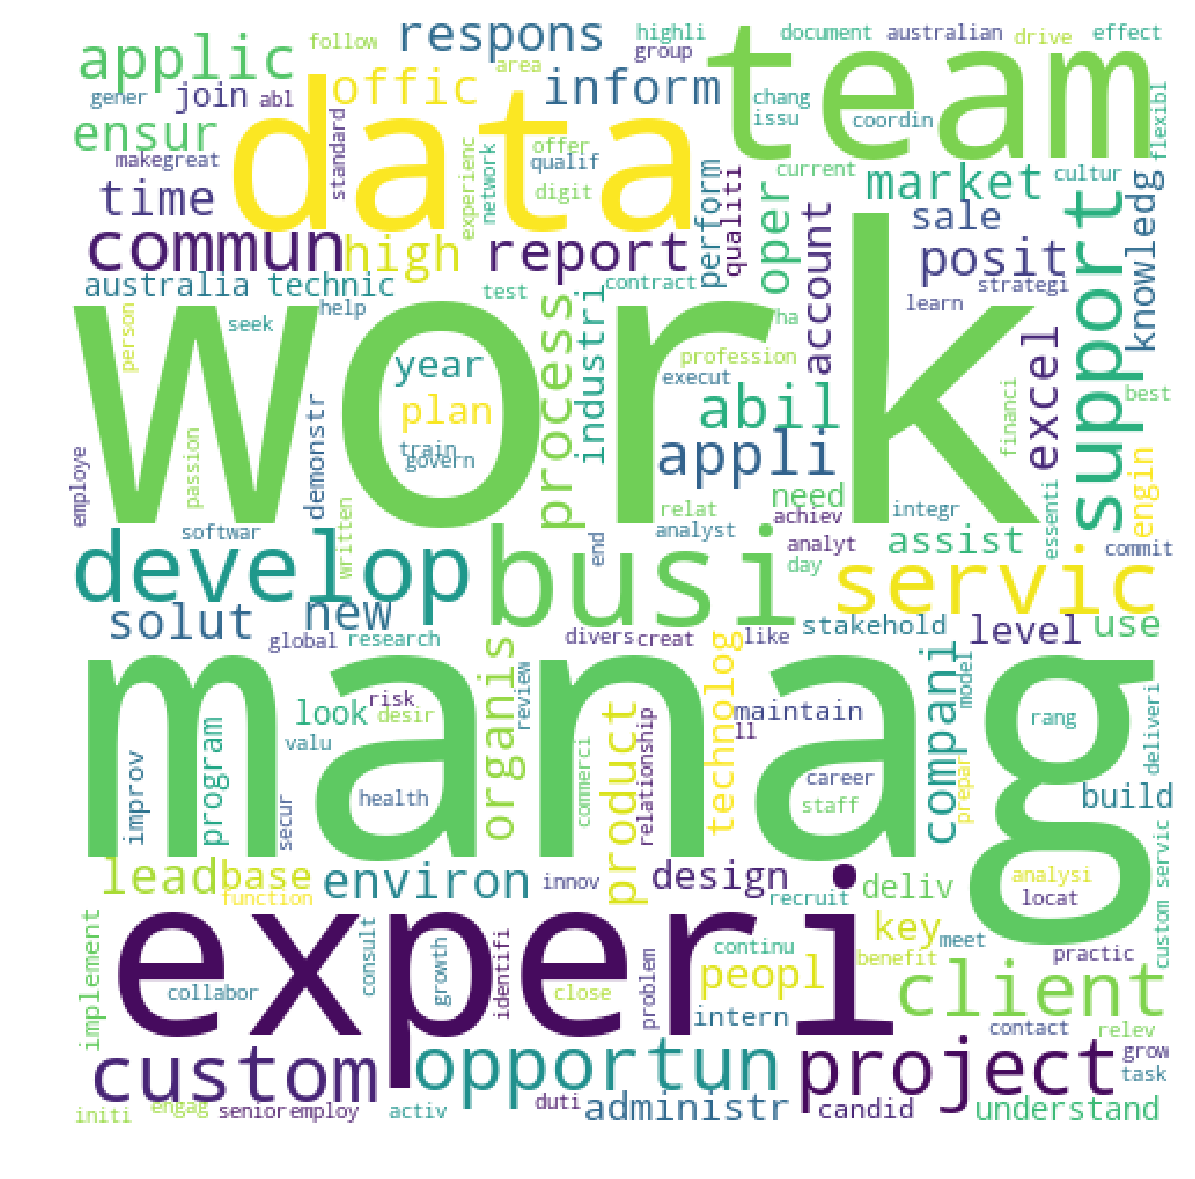

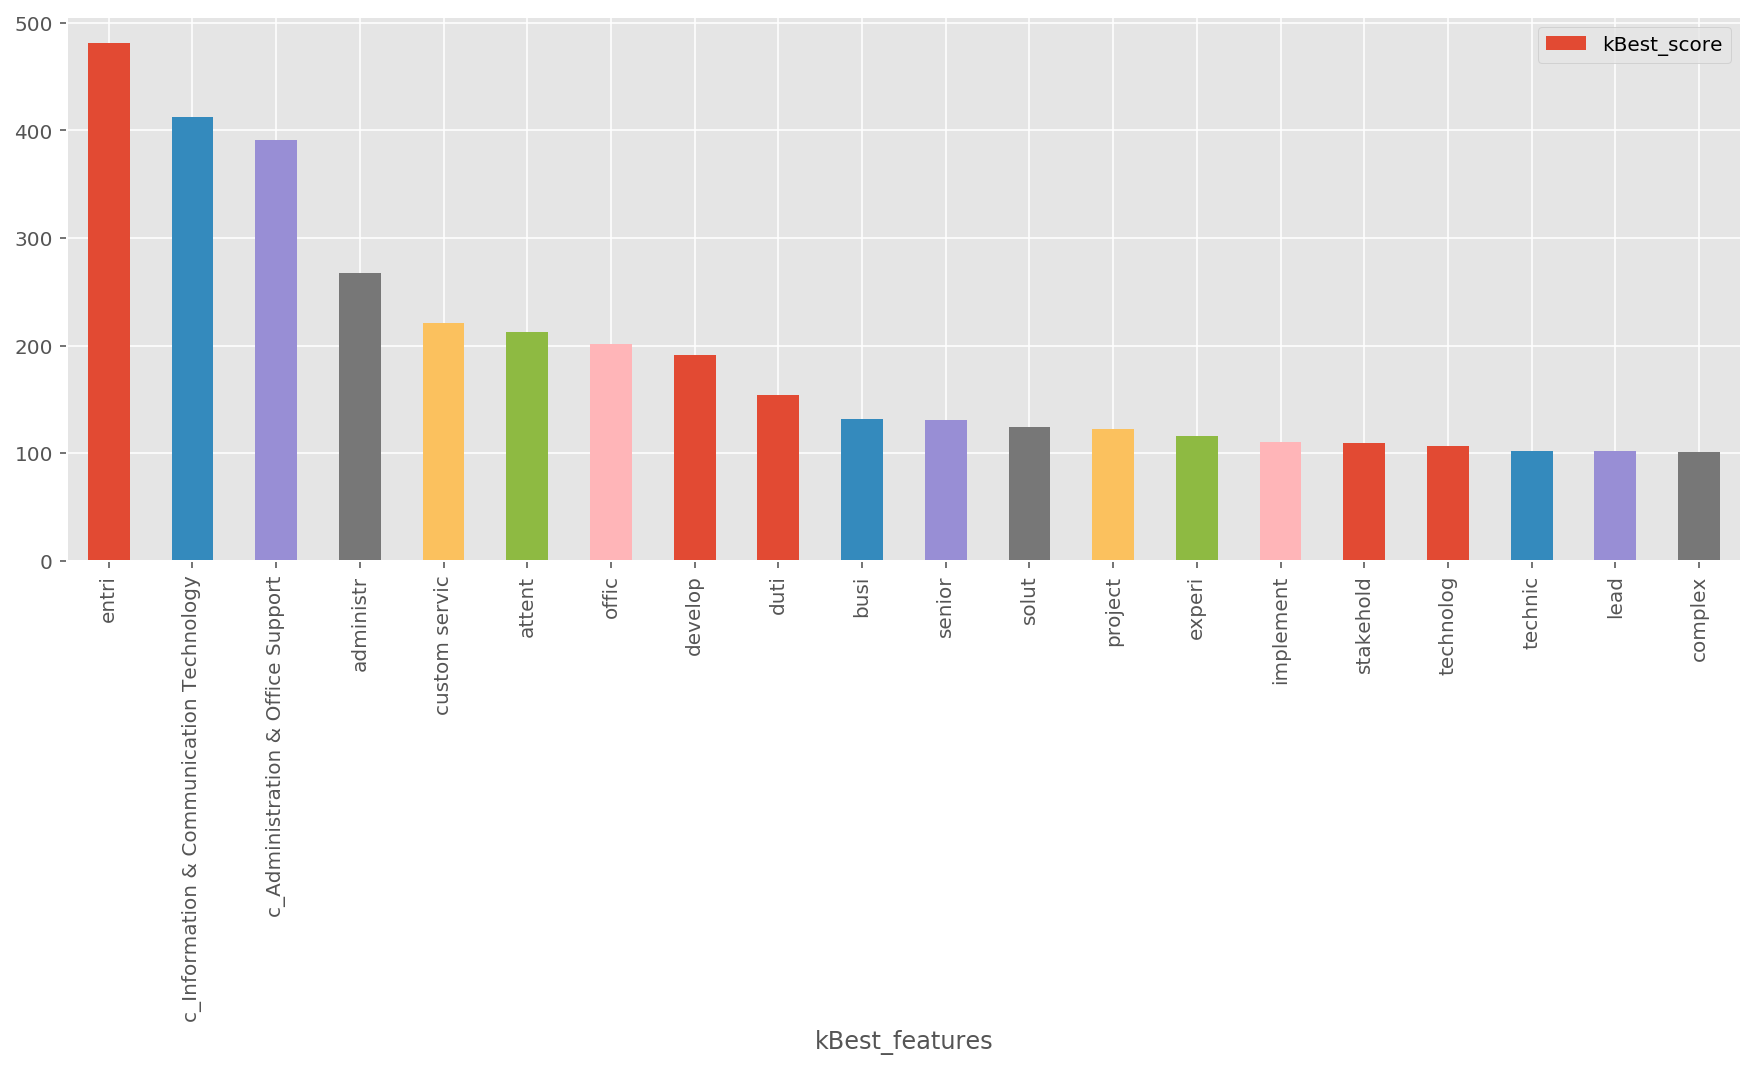

In [25]:
# Setting the vectorizer with different parameters to see the differences
cvec = CountVectorizer(ngram_range=(1,3),stop_words=custom_stop_words, max_features=200)

# apply feature selections
X_train_data2, X_test_data2 = tokenize_test(cvec)

Most features selected are pretty similar from both cvec and tvec

### Why Use TFIDF?
- Common words are penalized
- Rare words have more influence

Sklearn provides a tf-idf vectorizer that works similarly to the other vectorizers. 
Eliminate stop words to improve our analysis.


Features:  200


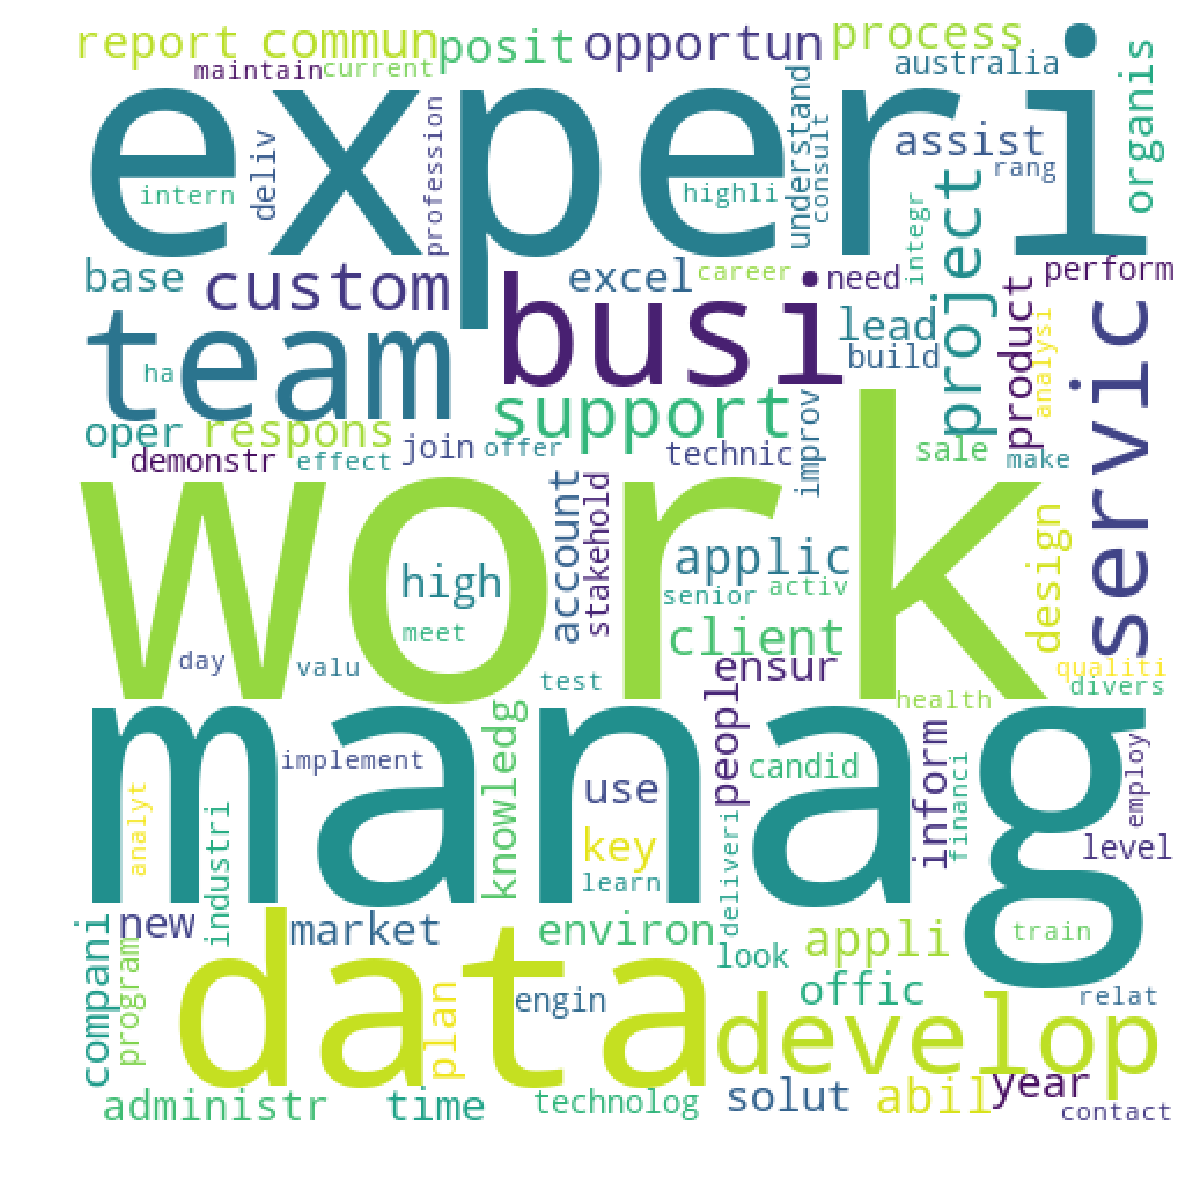

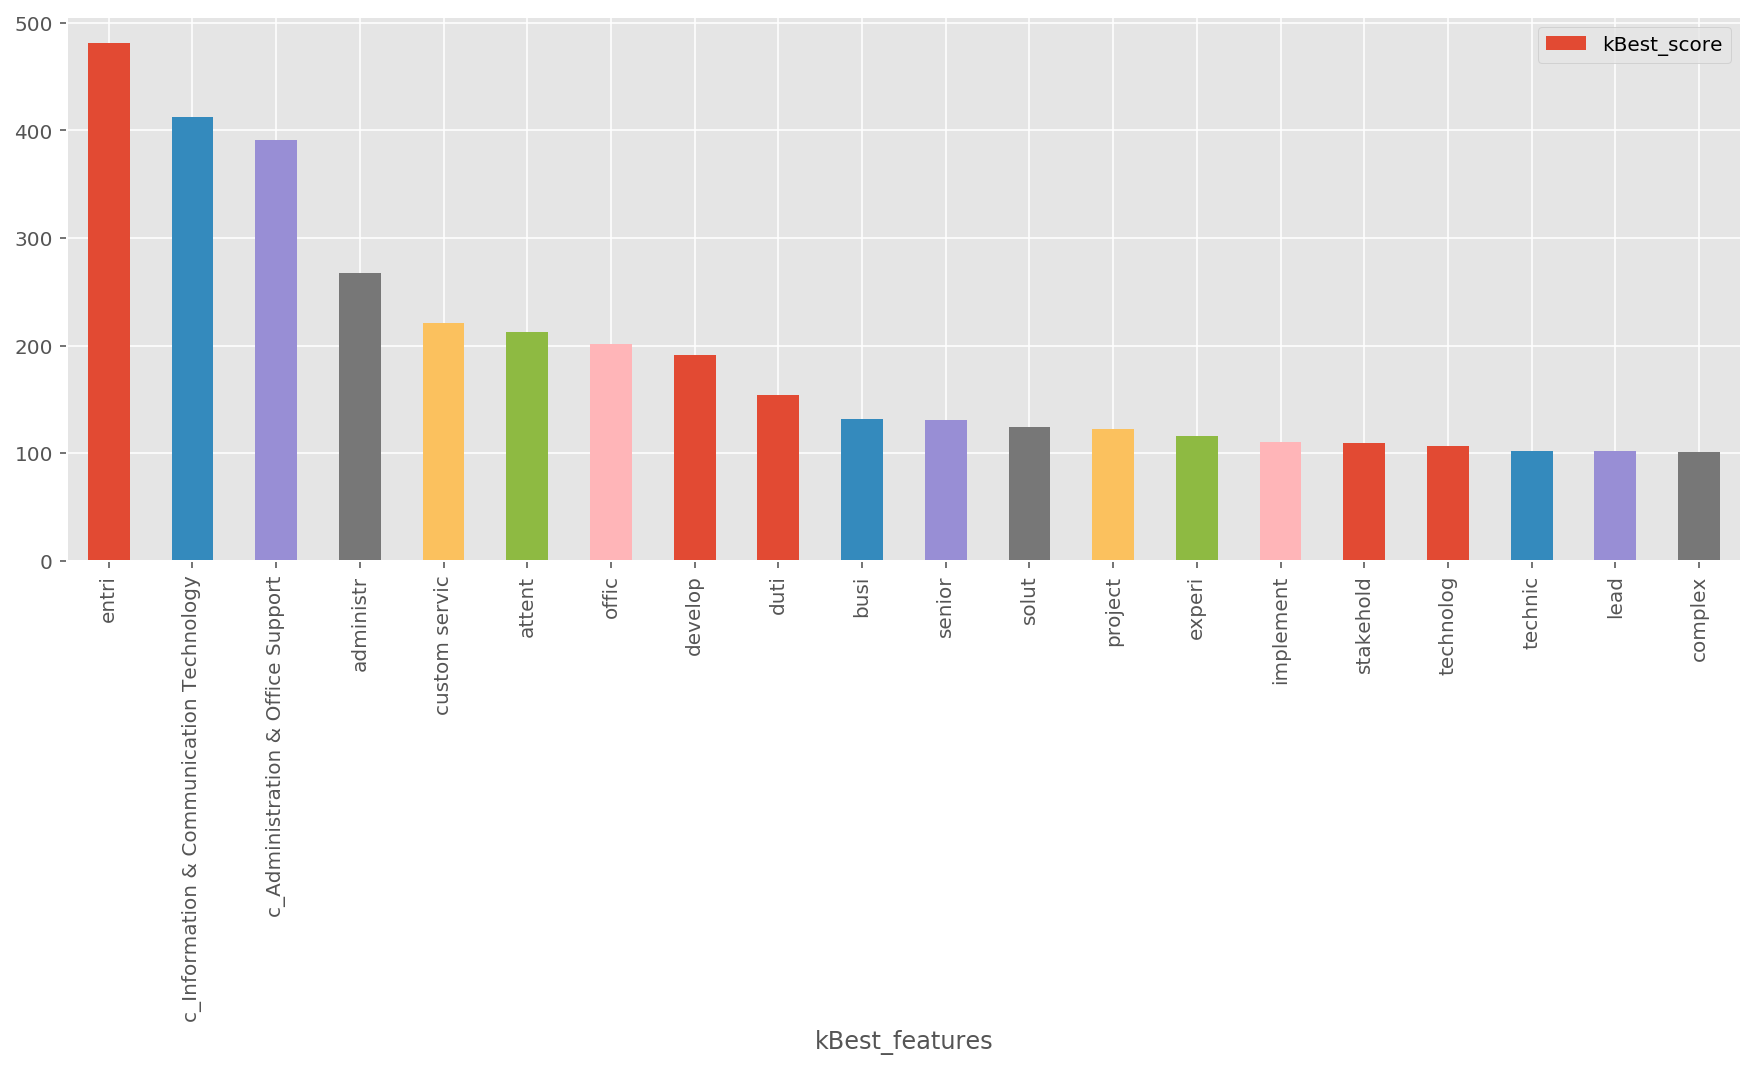

In [26]:
# Use the TfidfVectorizer
tvec = TfidfVectorizer(ngram_range=(2,3), stop_words=custom_stop_words, max_features=1000)

# too many features previously - reuse the variables

# reuse the variables -> too many feature previously
X_train_data3, X_test_data3 = tokenize_test(cvec)


Features:  200


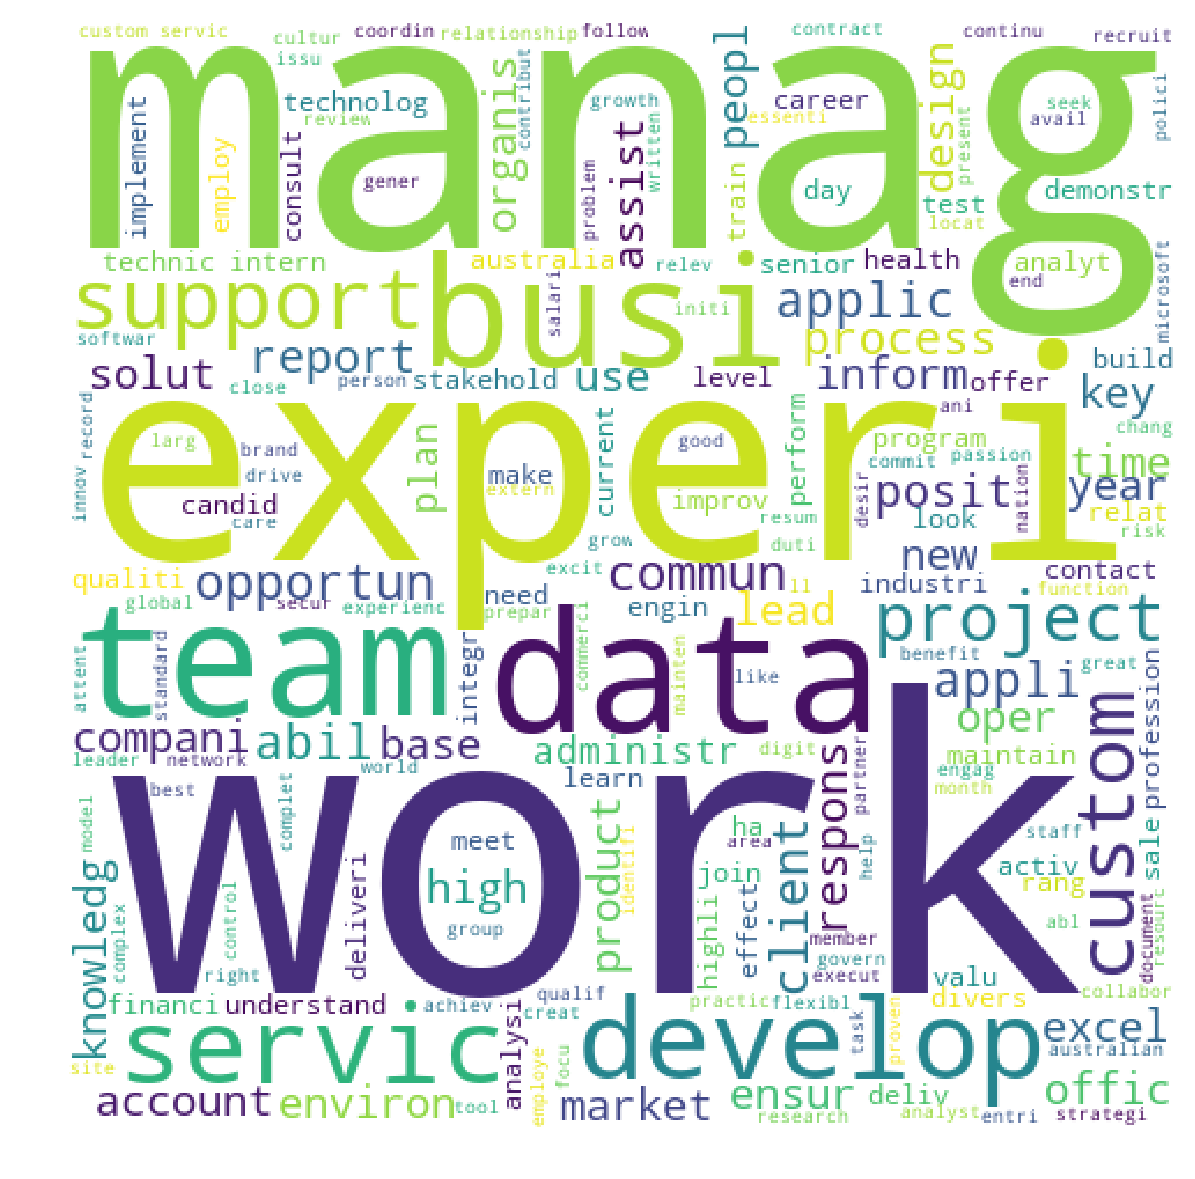

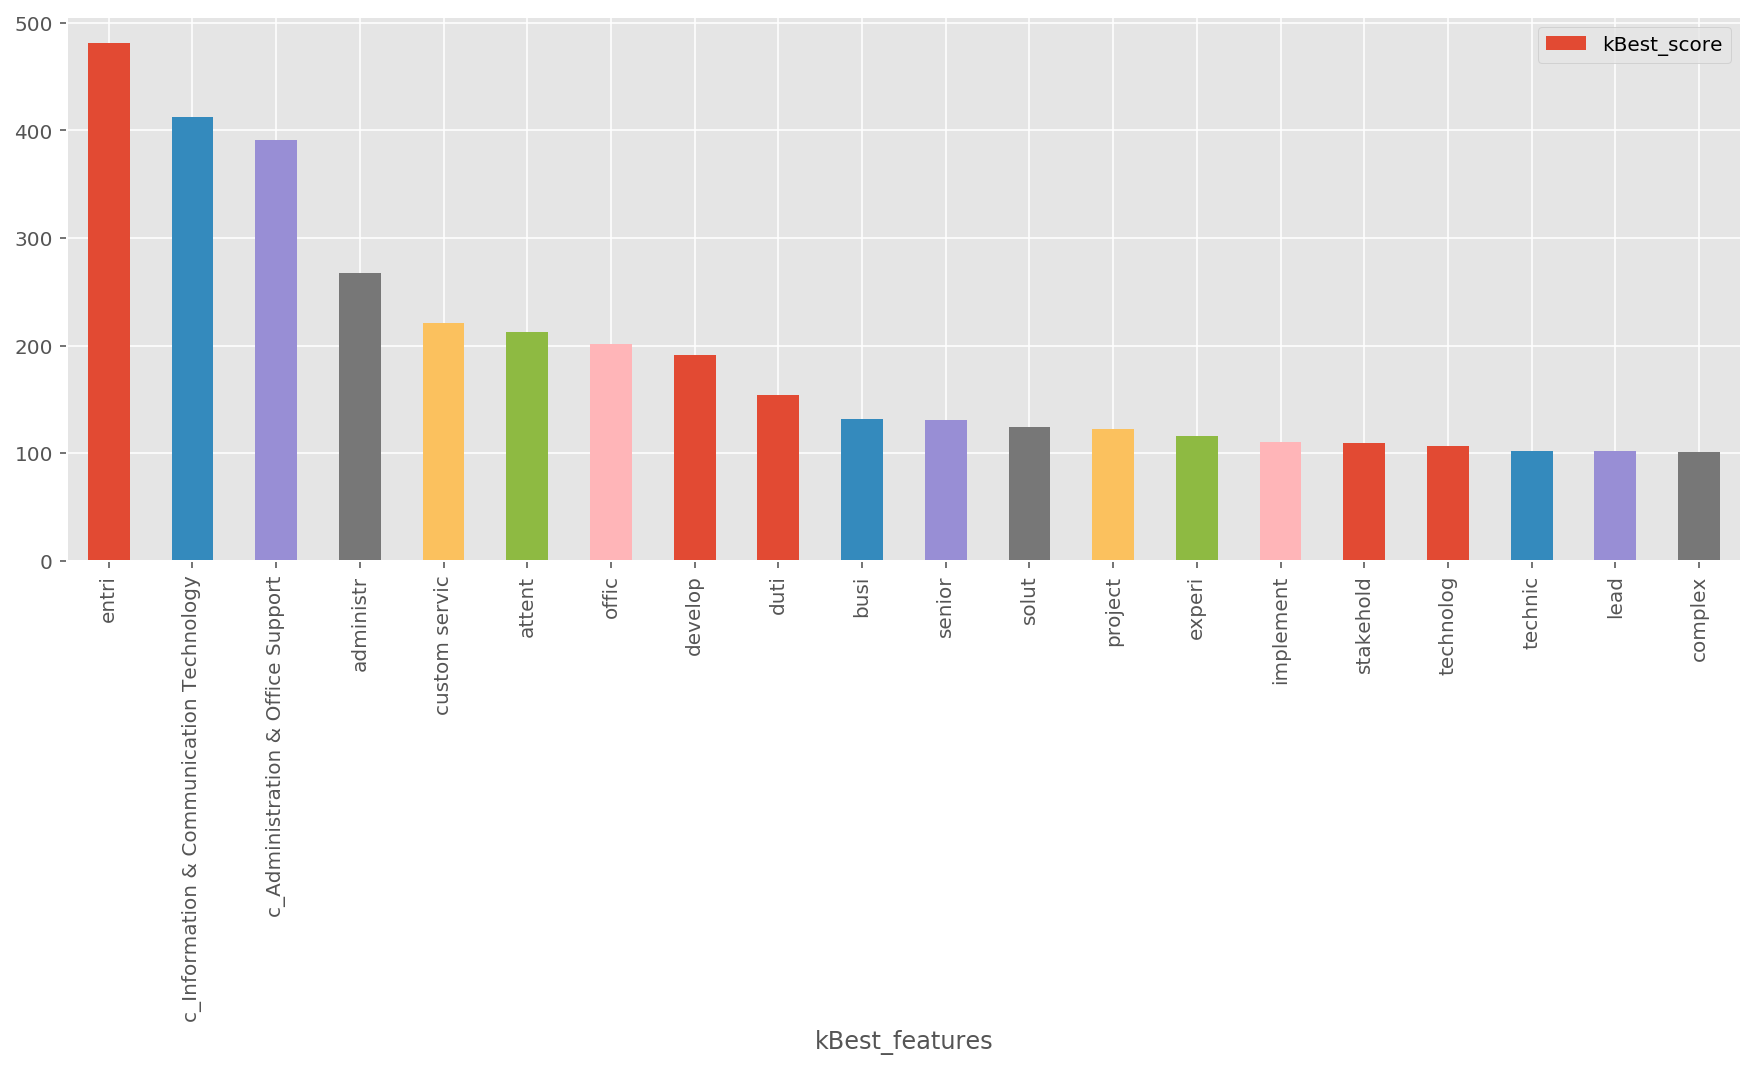

In [27]:
# Use the TfidfVectorizer
tvec = TfidfVectorizer(ngram_range=(1,3),stop_words=custom_stop_words, max_features=200)

# reuse the variables -> too many feature previously
X_train_data4, X_test_data4 = tokenize_test(cvec)


In [28]:
def apply_models(X_train_data, X_test_data):
    scores_list = []
    for model in models:
        scores_list.append(apply_model(model, models[model], X_train_data, X_test_data))

    scores_Df = pd.DataFrame(scores_list, index=models.values(), columns=colNames)
    return scores_Df

In [29]:
df = apply_models(X_train_data1, X_test_data1)
print('CVEC with word_max_features=1000 with ngrams of 2 - 3 words')
df

CVEC with word_max_features=1000 with ngrams of 2 - 3 words


,Train,Test,Accuracy Crossval,Accuracy Score
Multinomail Naive Bayes,0.476973,0.407348,0.397644,0.407348
BernoulliNB Naive Bayes,0.477370,0.413586,0.395959,0.413586
Logistic Regression L1,0.605724,0.416821,0.407549,0.416821
Logistic Regression L2,0.616916,0.416128,0.404579,0.416128
Random Forest,0.983163,0.457255,0.441818,0.457255


In [30]:
df = apply_models(X_train_data2, X_test_data2)
print('CVEC with word_max_features=200 with ngrams of 1 - 3 words')
df

CVEC with word_max_features=200 with ngrams of 1 - 3 words


,Train,Test,Accuracy Crossval,Accuracy Score
Multinomail Naive Bayes,0.415866,0.402726,0.390611,0.402726
BernoulliNB Naive Bayes,0.401307,0.388632,0.378529,0.388632
Logistic Regression L1,0.495296,0.431839,0.419932,0.431839
Logistic Regression L2,0.495395,0.429529,0.420329,0.429529
Random Forest,0.998712,0.468346,0.443101,0.468346


In [31]:
df = apply_models(X_train_data3, X_test_data3)
print('TVEC with word_max_features=1000 with ngrams of 2 - 3 words')
df

TVEC with word_max_features=1000 with ngrams of 2 - 3 words


,Train,Test,Accuracy Crossval,Accuracy Score
Multinomail Naive Bayes,0.415866,0.402726,0.390611,0.402726
BernoulliNB Naive Bayes,0.401307,0.388632,0.378529,0.388632
Logistic Regression L1,0.495395,0.431839,0.420031,0.431839
Logistic Regression L2,0.495395,0.429529,0.420329,0.429529
Random Forest,0.998712,0.463031,0.445674,0.463031


In [32]:
df = apply_models(X_train_data4, X_test_data4)
print('TVEC with word_max_features=200 with ngrams of 1 - 3 words')
df

TVEC with word_max_features=200 with ngrams of 1 - 3 words


,Train,Test,Accuracy Crossval,Accuracy Score
Multinomail Naive Bayes,0.415866,0.402726,0.390611,0.402726
BernoulliNB Naive Bayes,0.401307,0.388632,0.378529,0.388632
Logistic Regression L1,0.495395,0.432301,0.419833,0.432301
Logistic Regression L2,0.495395,0.429529,0.420329,0.429529
Random Forest,0.998712,0.466497,0.443001,0.466497


In [33]:
value_counts = dummy['salary_bracket'].value_counts()
value_counts

60     3614
80     2621
100    2590
120    2044
150    1790
200    1330
250     436
Name: salary_bracket, dtype: int64

In [34]:
baseline = value_counts.values[0] / value_counts.sum()
baseline

0.2505372616984402

Scores are pretty similar

The best model is Logistic Regression L2 

CVEC with word_max_features=200 with ngrams of 1 - 3 words


with 81% accurancy score to predict if the salary is classified as high or low

Top Features are
* Information and Communication Technology Classification
* Administration and Office Support
* Administr
* Attent
* Offic
* Custom Servic
* Develop
* Duti
* Senior
* Busi